### Estimating model parameters - AR(2) process

    1. Objective is to estimate the variance of white-noise process in a simulated AR2 process
    2. Estimate the coefficients of simulated AR2 process using Yule-Walker equations
    

###### Simulated AR(2) process 2contains following model form and specifications

$X_t = \phi1*X_{t-1}+\phi2*X_{t-2}+Zt$

$Zt \sim Normal(0,\sigma_t^2)$ and $\phi1 = 1/3$, $\phi2 = 1/2$

In [29]:
#Simulate AR(2) process
### set seed a common number, so we can reproduce the same datasets
set.seed(2017)

sigma <- 4
n <- 10000
phi <- c()
phi[1:2] <- c(1/3,1/2)

    
ar.process <- arima.sim(n,model=list(ar=phi),sd=sigma)
#ar.process[1:5]

In [9]:
#get auto-correlation coefficients
r <- c()
r[1:2] <- acf(ar.process,type = 'correlation',plot=F)$acf[2:3] ## find and name 2nd and 3rd sample autocorrelation
r

[1] 0.6814103 0.7255825

### Rx = b as per the Yule-Walker equations in matrix form
<img src ="rx_equals_b.PNG">


In [31]:
#get R matrix to solve for 'Phis'
R <- matrix(1,nr=2,nc=2) ## matrix R
R[1,2] <- r[1]
R[2,1] <- r[1]
b <- matrix(r,nrow = 2,ncol = 1)## b-column vector on the right

phi_hat <- solve(R,b)  ## because they are in the form of 1+r1*phi2 = r1, r1*
print(paste0("estimated coeffs are ",paste(phi_hat,collapse=","),collapse = ","))

[1] "estimated coeffs are 0.349072047074064,0.487721196857986"


##### Since we estimated the coefficients, now we can estimate the variance of the white noise as,

$\hat{\sigma_z^2} = c_0(1-\sum{\phi_i*r_i})$

Where $c_0$ is the auto-covariance at lag-0

<img src ="sigma_z_estimation.PNG">

In [26]:
c0 <- acf(ar.process,type = 'covariance',plot=F)$acf[1]
var_z <- c0*(1-sum(phi_hat*r))

print(paste0("estimated variance is ",var_z,collapse = ","))

[1] "estimated variance is 16.3716899100558"


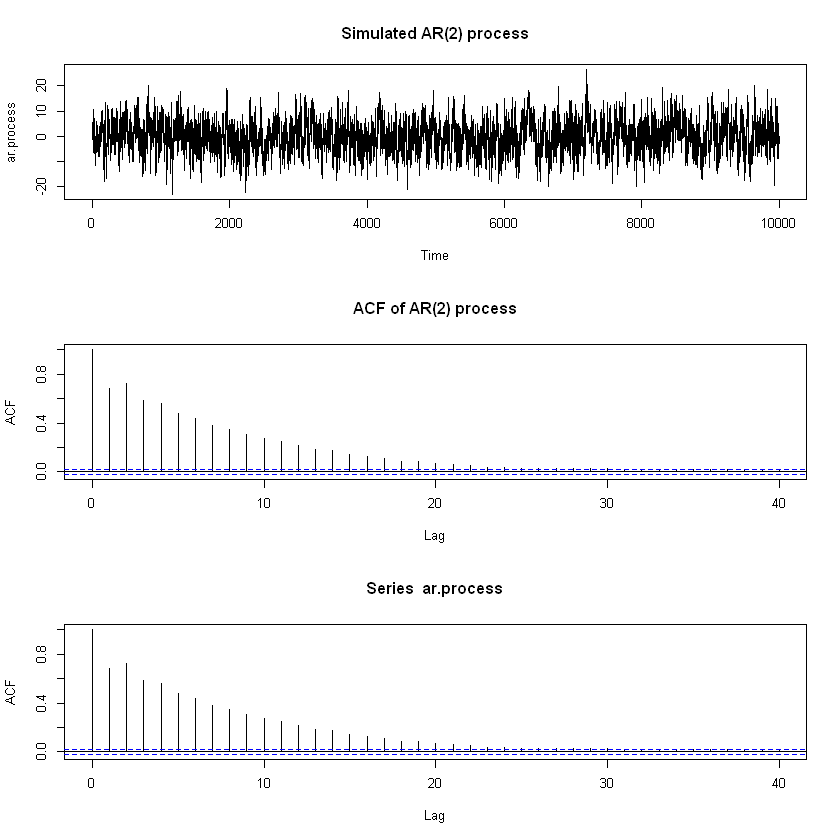

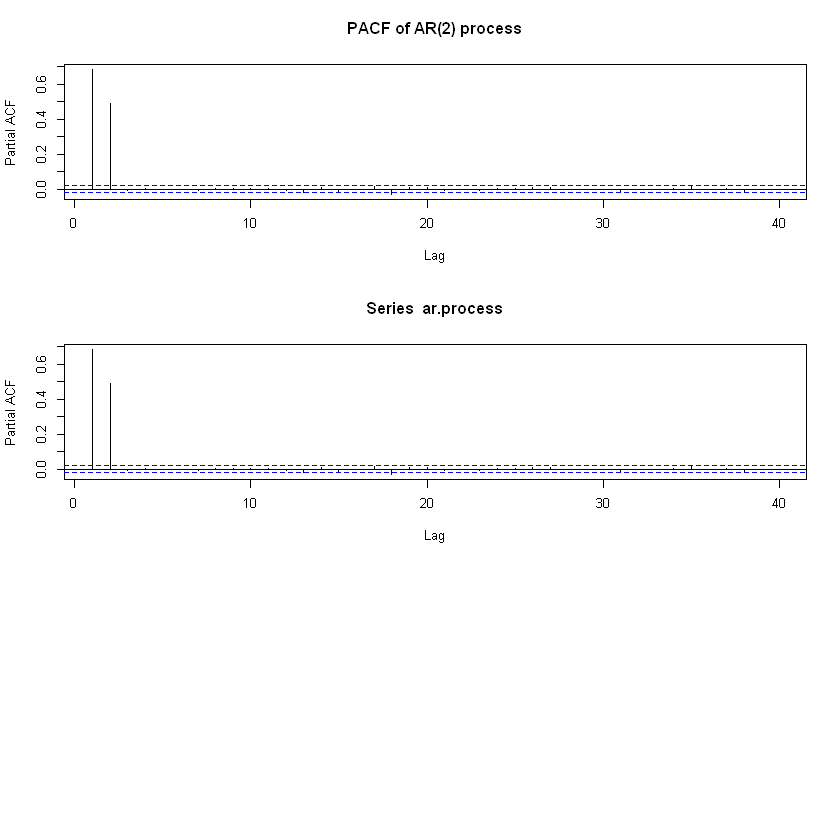

In [28]:
#let's do some plotting
par(mfrow = c(3,1)) #partition the screen using multi frame row option (with 3 rows and 1 column)
plot(ar.process,main='Simulated AR(2) process')
plot(acf(ar.process,main='ACF of AR(2) process'))
plot(acf(ar.process,type='partial',main='PACF of AR(2) process'))

### Here is the summary of results
<img src = "actual_vs_fitted_of_simulated_ar2_process.PNG">